# Limpieza de datos



## 1. Vista rápida al dataset


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## MUESTO MI DATA SET CON LOS DATOS Y SUS COLUMNAS
df = pd.read_csv("dataset_videojuegos.csv", index_col=0) 
df.head(100)S


,platform,release_date,summary,meta_score,user_review
name,,,,,
The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9
...,...,...,...,...,...
Street Fighter IV,PlayStation 3,"February 17, 2009",Street Fighter IV features a mix of returning ...,94,7.4
Super Mario Advance 4: Super Mario Bros. 3,Game Boy Advance,"October 21, 2003","A combination of exciting platforming action, ...",94,8.9
Jet Grind Radio,Dreamcast,"October 30, 2000","Join a graffiti crew, stamp your territory and...",94,8.3


In [26]:
# Cargar el dataset
df = pd.read_csv("dataset_videojuegos.csv")

# Mostrar las primeras filas para vista rápida
print(df.head())

# Mostrar información general
df.info()

# Mostrar estadísticas descriptivas
df.describe()

                                   name        platform        release_date  \
0  The Legend of Zelda: Ocarina of Time     Nintendo 64   November 23, 1998   
1              Tony Hawk's Pro Skater 2     PlayStation  September 20, 2000   
2                   Grand Theft Auto IV   PlayStation 3      April 29, 2008   
3                           SoulCalibur       Dreamcast   September 8, 1999   
4                   Grand Theft Auto IV        Xbox 360      April 29, 2008   

                                             summary  meta_score user_review  
0  As a young boy, Link is tricked by Ganondorf, ...          99         9.1  
1  As most major publishers' development efforts ...          98         7.4  
2  [Metacritic's 2008 PS3 Game of the Year; Also ...          98         7.7  
3  This is a tale of souls and swords, transcendi...          98         8.4  
4  [Metacritic's 2008 Xbox 360 Game of the Year; ...          98         7.9  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1

,meta_score
count,18800.000000
mean,70.648883
std,12.225006
min,20.000000
25%,64.000000
50%,72.000000
75%,80.000000
max,99.000000


#### A simple vista puedo ver que un juego se repite pero en diferente plataforma tambien creo que es mejor poner el release_date de texto a tipo data time


In [30]:
## Convertir release_date a datetime, manejando errores
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Verificar cambios
print(df[['release_date']].info())
print(df['release_date'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   release_date  18800 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 147.0 KB
None
0   1998-11-23
1   2000-09-20
2   2008-04-29
3   1999-09-08
4   2008-04-29
Name: release_date, dtype: datetime64[ns]


In [59]:
## EN ESTA PARTE VEO CUANTOS TIENE DE VALOR NaT
print(df['release_date'].isna().sum())  # Cantidad de valores NaT
print(df[df['release_date'].isna()].head(10))  # Muestra algunos registros problemáticos


0
Empty DataFrame
Columns: [name, platform, release_date, summary, meta_score, user_review]
Index: []


In [32]:
print(df['user_review'].unique()[:20])  # Muestra los primeros valores únicos


['9.1' '7.4' '7.7' '8.4' '7.9' '8.0' '8.3' '6.2' '8.7' '7.5' '8.8' '8.5'
 '8.6' '8.9' '8.2' '9.2' '7.8' '9.0' '9.3' '8.1']


In [60]:
## Aqui si aparecen valores tbd los convertire en NaN y despus a float
df['user_review'] = pd.to_numeric(df['user_review'], errors='coerce')

# Verificar si hay NaN
print(df['user_review'].isna().sum())


0


In [35]:
# Rellenar con la media de la columna
df.loc[:, 'user_review'] = df['user_review'].fillna(df['user_review'].mean())

In [36]:
# Eliminar las filas con NaN
df = df.dropna(subset=['user_review'])

In [37]:
print(df['user_review'].isna().sum())

0


In [38]:
print(df[['meta_score', 'user_review']].describe())


         meta_score   user_review
count  18800.000000  18800.000000
mean      70.648883      6.990846
std       12.225006      1.301561
min       20.000000      0.200000
25%       64.000000      6.400000
50%       72.000000      7.200000
75%       80.000000      7.900000
max       99.000000      9.700000


## 2. Datos duplicados

In [12]:
#Aqui veo las filas duplicadas en este caso son 3 y las voy a eliminar
df[df.duplicated()]

,platform,release_date,summary,meta_score,user_review
name,,,,,
Pokemon Moon,3DS,"November 18, 2016","Using Pokemon Bank, you'll be able to transfer...",87,7.6
Pokemon Black Version,DS,"March 6, 2011",Pokémon Black Version and Pokémon White Versio...,87,7.7
Pokemon Sword,Switch,"November 15, 2019",Pokémon Sword and Pokémon Shield are set in Ga...,80,4.6


In [27]:
#Eliminacion de las filas duplicadas
df = df.drop_duplicates()


In [29]:
#Aqui verifico que efectivamente se alla borrado las filas duplicadas
df[df.duplicated()]

,name,platform,release_date,summary,meta_score,user_review


In [39]:
print("Duplicados en el dataset:", df.duplicated().sum())

Duplicados en el dataset: 0


## 3. Datos nulos
Muestre por columnas la cantidad de datos nulos, implemente una estrategia para no dejar ningun dato nulo, no elimine ningún dato.


In [15]:
# Mostrar la cantidad de datos nulos por columna
print("Cantidad de datos nulos por columna:")
print(df.isnull().sum())

# Estrategia para llenar datos nulos
# Para la columna 'summary' (tipo texto), rellenamos con 'No summary available'
df['summary'] = df['summary'].fillna('No summary available')

# Verificar nuevamente si quedan datos nulos
print("\nDespués del tratamiento de datos nulos:")
print(df.isnull().sum())


Cantidad de datos nulos por columna:
name            0
platform        0
release_date    0
summary         0
meta_score      0
user_review     0
dtype: int64

Después del tratamiento de datos nulos:
name            0
platform        0
release_date    0
summary         0
meta_score      0
user_review     0
dtype: int64


## 4. Verifique outlaiers de cada fila

In [40]:
def detectar_outliers(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return (columna < limite_inferior) | (columna > limite_superior)

# Detectar outliers en ambas columnas
outliers_meta_score = detectar_outliers(df['meta_score'])
outliers_user_review = detectar_outliers(df['user_review'])

# Contar cuántos hay
print("Outliers en meta_score:", outliers_meta_score.sum())
print("Outliers en user_review:", outliers_user_review.sum())

# Mostrar algunas filas con outliers
df_outliers = df[outliers_meta_score | outliers_user_review]
print(df_outliers.head(10))

Outliers en meta_score: 358
Outliers en user_review: 775
                                   name        platform release_date  \
265         Out of the Park Baseball 17              PC   2016-03-22   
336           Tiger Woods PGA Tour 2005              PC   2004-09-20   
753      Call of Duty: Modern Warfare 3        Xbox 360   2011-11-08   
901                          Diablo III              PC   2012-05-15   
917      Call of Duty: Modern Warfare 3   PlayStation 3   2011-11-08   
1239  LostWinds: Winter of the Melodias             Wii   2009-10-19   
1442                   Mortal Kombat 11        Xbox One   2019-04-23   
1534                            F1 2021              PC   2021-07-16   
1583                             NHL 20        Xbox One   2019-09-10   
1625          Call of Duty: Black Ops 4        Xbox One   2018-10-12   

                                                summary  meta_score  \
265   Step into the shoes of a team owner, GM, and/o...          92   
336   Ti

In [46]:
## para eliminarlos
df = df[~(outliers_meta_score | outliers_user_review)]
# Como ya elimine los outliers los muestro para corroborar
print("Nueva cantidad de datos después de eliminar outliers:", df.shape[0])

Nueva cantidad de datos después de eliminar outliers: 17843


C:\Users\sauln.LAPTOP-1JCJTJBV\AppData\Local\Temp\ipykernel_9004\535035919.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~(outliers_meta_score | outliers_user_review)]


## 4.1 Datos numéricos

In [47]:
# Vizualizacion de los datos numericos
print(df[['meta_score', 'user_review']].describe())


         meta_score   user_review
count  17843.000000  17843.000000
mean      71.674158      7.170731
std       11.008749      1.029785
min       40.000000      4.200000
25%       65.000000      6.600000
50%       73.000000      7.300000
75%       80.000000      7.900000
max       99.000000      9.700000


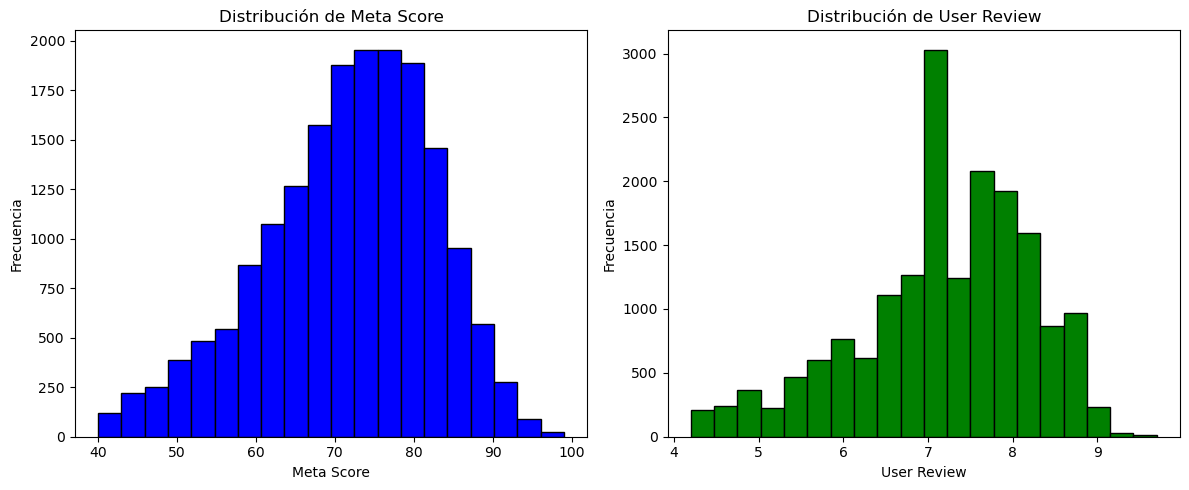

In [49]:
# Vizualizacion de la distribucion de los datos
import matplotlib.pyplot as plt

# Histogramas de meta_score y user_review
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(df['meta_score'], bins=20, color='blue', edgecolor='black')
axes[0].set_title('Distribución de Meta Score')
axes[0].set_xlabel('Meta Score')
axes[0].set_ylabel('Frecuencia')

axes[1].hist(df['user_review'], bins=20, color='green', edgecolor='black')
axes[1].set_title('Distribución de User Review')
axes[1].set_xlabel('User Review')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


#### Observaciones, pues a lo que observo no veo ningun resultado o rango fuero de lo normal todo corresponde y gracias a la eliminacion de los outlaires


## 4.2 Datos categóricos

In [58]:
## primero veo cuántas categorías hay en cada columna:
print("Plataformas únicas:", df['platform'].nunique())
print("Años únicos:", df['release_date'].dt.year.nunique())

Plataformas únicas: 22
Años únicos: 27


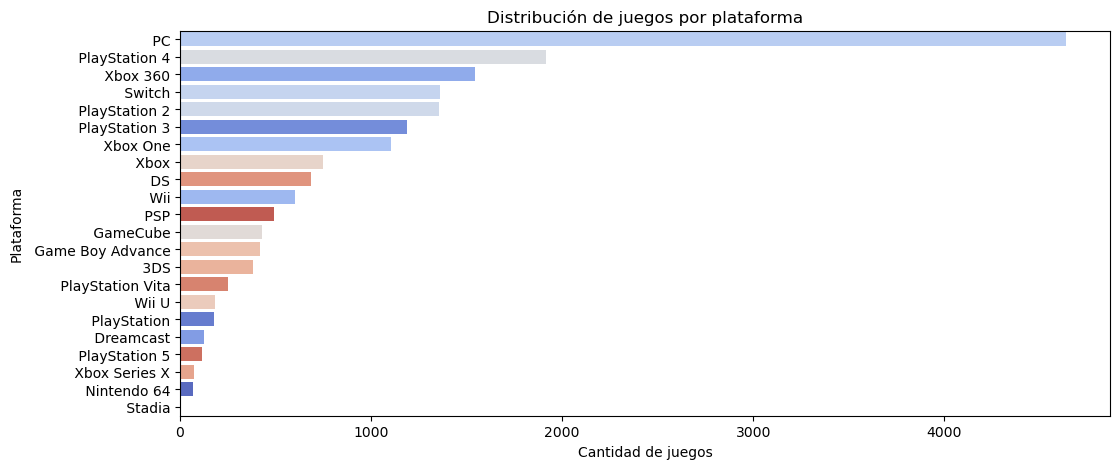

In [56]:
# creo tabla par ver mejor los datos y ver si tengo algo fuera de lo normal
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.countplot(y=df['platform'], hue=df['platform'], order=df['platform'].value_counts().index, legend=False, palette="coolwarm")
plt.title("Distribución de juegos por plataforma")
plt.xlabel("Cantidad de juegos")
plt.ylabel("Plataforma")
plt.show()


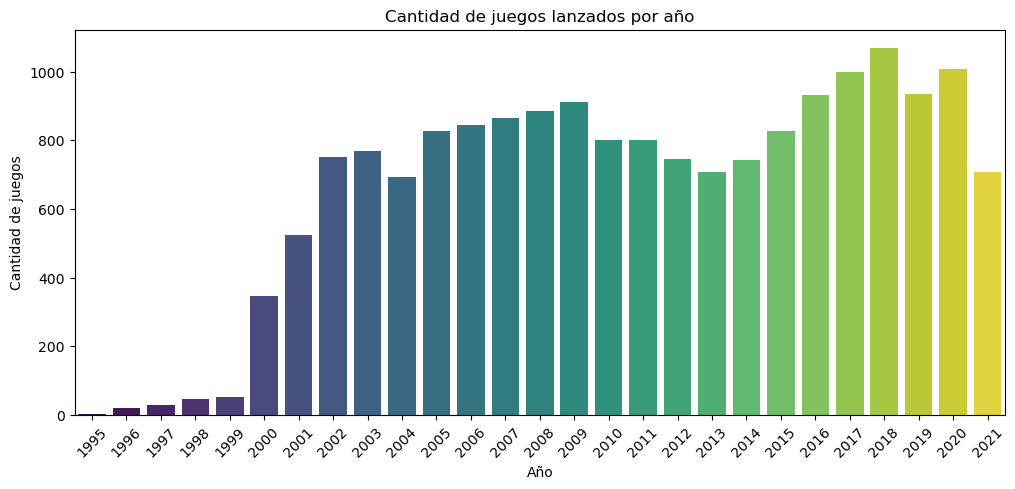

In [57]:
## Cree una tabla para vizualzacr mejor los datos categoricos y ver si tengo algo que haga ruido
plt.figure(figsize=(12, 5))
sns.countplot(x=df['release_date'].dt.year, hue=df['release_date'].dt.year, legend=False, palette="viridis")
plt.title("Cantidad de juegos lanzados por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de juegos")
plt.xticks(rotation=45)
plt.show()


### TODO EN ORDEN CON DATOS REALES Y CORREGI ANTERIONMENTE ALGUNOS TIPOS DE DATOS COMO EL DATA TIME